# Calculation of the Half-Life of a Mean-Reverting Time Series

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from statsmodels.tsa.stattools import coint

In [5]:
from statsmodels.api import OLS

In [6]:
df1=pd.read_excel('GLD.xls')

In [7]:
df2=pd.read_excel('GDX.xls')

In [8]:
df=pd.merge(df1, df2, on='Date', suffixes=('_GLD', '_GDX'))

In [9]:
df.set_index('Date', inplace=True)

In [10]:
df.sort_index(inplace=True)

In [11]:
df

,Open_GLD,High_GLD,Low_GLD,Close_GLD,Volume_GLD,Adj Close_GLD,Open_GDX,High_GDX,Low_GDX,Close_GDX,Volume_GDX,Adj Close_GDX
Date,,,,,,,,,,,,
2006-05-23,65.99,67.16,65.91,66.38,10509700,66.38,37.75,39.22,37.75,37.96,620900,37.85
2006-05-24,64.83,65.16,63.22,64.06,11065600,64.06,37.13,37.57,35.87,36.52,638600,36.41
2006-05-25,64.12,64.76,63.76,64.70,6505400,64.70,37.18,38.32,36.98,38.32,367000,38.21
2006-05-26,65.01,65.10,63.75,65.10,5265900,65.10,38.74,38.74,37.77,38.55,269400,38.44
2006-05-30,65.20,66.24,65.00,65.11,8240200,65.11,39.50,39.72,38.11,38.17,559100,38.06
...,...,...,...,...,...,...,...,...,...,...,...,...
2007-11-26,82.25,82.25,81.13,81.30,7440200,81.30,49.43,49.43,46.85,47.06,1966500,47.06
2007-11-27,80.70,80.89,79.81,80.10,7229900,80.10,46.84,46.84,45.74,46.61,2329700,46.61
2007-11-28,79.42,79.87,78.76,79.57,9706700,79.57,46.11,48.00,46.06,47.86,3893200,47.86


## Run cointegration (Engle-Granger) test

In [12]:
coint_t, pvalue, crit_value=coint(df['Adj Close_GLD'], df['Adj Close_GDX'])

In [13]:
# abs(t-stat) > critical value at 95%.
# pvalue says probability of null hypothesis (of no cointegration) is only 1.8%
(coint_t, pvalue, crit_value)

(-3.6981160763300536,
 0.01842783540953775,
 array([-3.92518794, -3.35208799, -3.05551324]))

## Determine hedge ratio

In [14]:
model=OLS(df['Adj Close_GLD'], df['Adj Close_GDX'])

In [15]:
results=model.fit()

In [16]:
hedgeRatio=results.params

In [17]:
hedgeRatio

Adj Close_GDX    1.639523
dtype: float64

##  z = GLD - hedgeRatio*GDX

In [18]:
z=df['Adj Close_GLD']-hedgeRatio[0]*df['Adj Close_GDX']

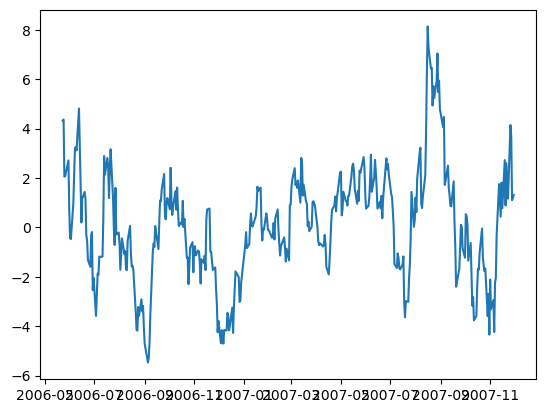

In [19]:
plt.plot(z)

In [20]:
prevz=z.shift()

In [21]:
dz=z-prevz

In [22]:
dz=dz[1:,]

In [23]:
prevz=prevz[1:,]

In [24]:
model2=OLS(dz, prevz-np.mean(prevz))

In [25]:
results2=model2.fit()

In [26]:
theta=results2.params

In [27]:
theta

x1   -0.088423
dtype: float64

In [28]:
halflife=-np.log(2)/theta

In [29]:
halflife

x1    7.839031
dtype: float64